In [1]:
import scanpy as sc


In [2]:
%pwd

'C:\\Users\\User\\Desktop\\Programming\\Python\\DSC680\\Final project2'

### Importing data and EDA

In [3]:
"""importing dataset brain_counts.csv. This dataset has 23433 features. Each feature correspond to a gene.
Each index corresponds to a cell.
"""

import pandas as pd
df_brain = pd.read_csv("data/brain_counts.csv", index_col=0)
df_brain.head(2)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#checking the number of rows and columns
df_brain.shape

(3401, 23433)

In [5]:
#checking column names
df_brain.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)

In [6]:
#checking wether the na values are present in the dataset
df_brain.isnull().sum()

0610005C13Rik        0
0610007C21Rik        0
0610007L01Rik        0
0610007N19Rik        0
0610007P08Rik        0
                    ..
Zzef1                0
Zzz3                 0
a                    0
l7Rn6                0
zsGreen_transgene    0
Length: 23433, dtype: int64

In [7]:
#the df_brain dataframe info
df_brain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3401 entries, A1.B003290.3_38_F.1.1 to P9.MAA001894.3_39_F.1.1
Columns: 23433 entries, 0610005C13Rik to zsGreen_transgene
dtypes: int64(23433)
memory usage: 608.1+ MB


In [8]:
"""Downloading the dataframe containing metadata for the brain_counts.csv file"""
metadata_brain = pd.read_csv("data/brain_metadata.csv", index_col="cell")
metadata_brain.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [9]:
#displaying an array of the metadata columns
metadata_brain.columns.values

array(['cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id',
       'plate.barcode'], dtype=object)

In [10]:
#displaying the number of rows and columns of the metadata dataframe
metadata_brain.shape

(3401, 5)

In [11]:
"""Creating an annotation data object"""
anndata = sc.AnnData(X = df_brain, obs = metadata_brain)
print(anndata)

AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'


In [12]:
"""the anndata object consists of 4 parts
1. anndata.X stores the count matrix (array)
2. anndata.obs stores metadata describibg cells (dataframe)
3. anndata.var stores metadata describing genes (dataframe)
4. anndata.uns stores some additional information regarding the main dataframe (dataframe). 
"""
anndata.var

""
0610005C13Rik
0610007C21Rik
0610007L01Rik
0610007N19Rik
0610007P08Rik
...
Zzef1
Zzz3
a
l7Rn6


In [13]:
# printing the gene names as an Index
anndata.var_names

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)

In [14]:
#printing metadata about cells
anndata.obs

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926
P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930
P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932


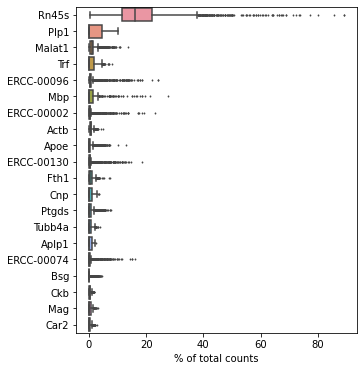

In [15]:
#display genes that yield the highest fraction of counts in each single cell, across all cells.
# import matplotlib.pyplot as plt
# sc.set_figure_params(figsize=(8, 6))
# sc.pl.highest_expr_genes(anndata, n_top=20)
# plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,6), gridspec_kw={'left':0.25})
sc.pl.highest_expr_genes(anndata, n_top=20, ax=ax)
# plt.savefig("top_20")
plt.show()


In [16]:
"""creating a new column ERCC. This column contains information about the spike-ins.
Spike-ins are RNA transcripts added as controls. The ERCC column contains only bool values"""
anndata.var["ERCC"] =anndata.var_names.str.contains("ERCC")

In [17]:
anndata.var["ERCC"]

0610005C13Rik        False
0610007C21Rik        False
0610007L01Rik        False
0610007N19Rik        False
0610007P08Rik        False
                     ...  
Zzef1                False
Zzz3                 False
a                    False
l7Rn6                False
zsGreen_transgene    False
Name: ERCC, Length: 23433, dtype: bool

In [18]:
anndata.write('data/brain_raw.h5ad')

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


### Quality control metrics

In [19]:
#calculating the quality control metrics
#the calculate_qc_metrics function returns two dataframes
#the one dataframe contains quality control metrics for cells, and the second
#dataframe contains quality control metrics for genes
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
anndata=sc.read('data/brain_raw.h5ad')
qc = sc.pp.calculate_qc_metrics(anndata, qc_vars = ['ERCC'])

#dataframe containing quality control metrics for cells
cell_qc = qc[0]
#dataframe containing quality control metrics for genes
gene_qc= qc[1]

print('The cell quality control dataframe')
print("-"*40)
print(cell_qc.head(3))
print("-"*40)

print('The gene quality control dataframe')
print("-"*40)
print(gene_qc.head(3))

The cell quality control dataframe
----------------------------------------
                         n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                  
A1.B003290.3_38_F.1.1                 3359                 8.119696   
A1.B003728.3_56_F.1.1                 1718                 7.449498   
A1.MAA000560.3_10_M.1.1               3910                 8.271548   

                         total_counts  log1p_total_counts  \
cell                                                        
A1.B003290.3_38_F.1.1        390075.0           12.874097   
A1.B003728.3_56_F.1.1        776439.0           13.562474   
A1.MAA000560.3_10_M.1.1     1616087.0           14.295519   

                         pct_counts_in_top_50_genes  \
cell                                                  
A1.B003290.3_38_F.1.1                     25.884766   
A1.B003728.3_56_F.1.1                     43.051933   
A1.MAA000560.3_10_M.1.1                   

### The number of total reads per cell

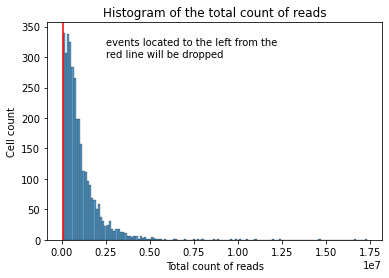

In [20]:
"""Cells with total count of reads less than 60000 genes per a cell should be removed.
This boundary is marked as the red line in the graph"""
%matplotlib inline
import seaborn as sns
sns.histplot(cell_qc['total_counts'])
plt.axvline(60000, color='red')
plt.ylabel("Cell count")
plt.xlabel("Total count of reads")
plt.title("Histogram of the total count of reads")
plt.text(0.25e7, 300, "events located to the left from the \nred line will be dropped")
plt.style.use("ggplot")
# plt.savefig("Histogram of the total count of reads")

### Detected genes

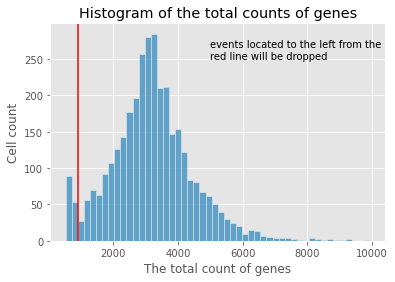

In [21]:
"""Cells with total count of detected genes less than 900 will be removed"""
%matplotlib inline
sns.histplot(cell_qc['n_genes_by_counts'])
plt.axvline(900, color='red')
plt.ylabel("Cell count")
plt.xlabel("The total count of genes")
plt.title("Histogram of the total counts of genes")
plt.text(5000, 250, "events located to the left from the \nred line will be dropped")
plt.style.use("ggplot")
# plt.savefig("Histogram of the total counts of genes")

### Detecting spike-ins

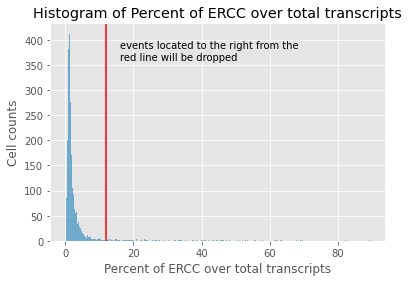

In [22]:
"""Histogram of Percent of ERCC over total transcripts. ERCC are control transcripts added to cells
to monitor the quality of the experiment"""
%matplotlib inline
sns.histplot(cell_qc['pct_counts_ERCC'])
plt.axvline(12, color='red')
plt.ylabel("Cell counts")
plt.xlabel("Percent of ERCC over total transcripts")
plt.title("Histogram of Percent of ERCC over total transcripts")
plt.text(16, 360, "events located to the right from the \nred line will be dropped")
plt.style.use("ggplot")
# plt.savefig("Percent of ERCC over total transcripts")

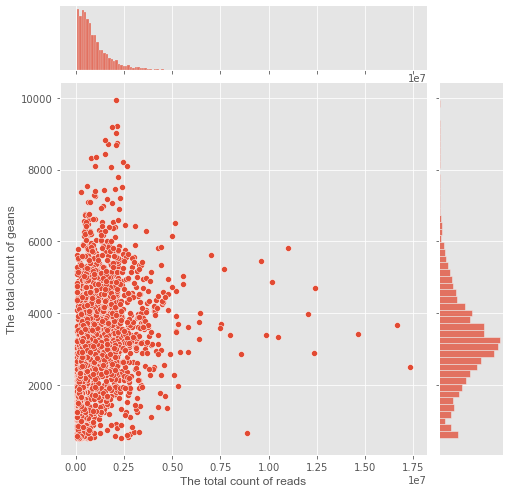

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

h=sns.jointplot(
    data=cell_qc,
    x="total_counts",
    y="n_genes_by_counts",
    kind="scatter", height=7)
h.set_axis_labels("The total count of reads", "The total count of geans", fontname="Arial")

plt.style.use("ggplot")
plt.savefig("jointplot")

### Filtering genes and cells

In [24]:
#removing rows which the column 'pct_counts_ERCC' values greater than 11
print("before filtering", anndata)
anndata = anndata[cell_qc['pct_counts_ERCC'] <=11]
print("after filtering", anndata)

before filtering AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'
after filtering View of AnnData object with n_obs × n_vars = 3233 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'


In [25]:
#filtering out rows (cells) with less than 900 genes and 60000 reads
print("before filtering", anndata)
sc.pp.filter_cells(anndata, min_genes = 900)
sc.pp.filter_cells(anndata, min_counts=60000)
print("after filtering", anndata)

Trying to set attribute `.obs` of view, copying.


before filtering View of AnnData object with n_obs × n_vars = 3233 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'
after filtering AnnData object with n_obs × n_vars = 3191 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC'


In [26]:
"""removing undetectable genes. A gene is considered as detectable if it has at least  10 reads in 3 cells"""
print("before filtering", anndata)
sc.pp.filter_genes(anndata, min_cells = 3)
sc.pp.filter_genes(anndata, min_counts = 10)
print("after filtering", anndata)

before filtering AnnData object with n_obs × n_vars = 3191 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC'
after filtering AnnData object with n_obs × n_vars = 3191 × 18252
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts'


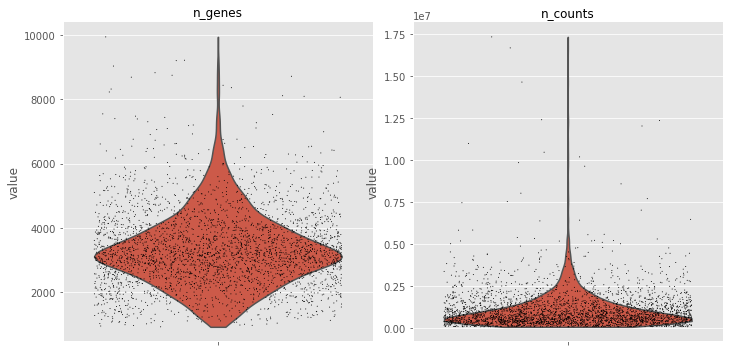

In [27]:
#QC check of the counts post-filtering
sc.pl.violin(anndata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

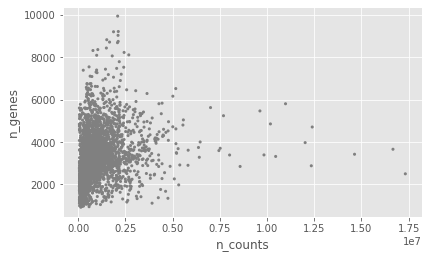

In [28]:
#QC check of the counts post-filtering
sc.pl.scatter(anndata, x='n_counts', y='n_genes')

In [31]:
"""Normalizing library size"""
%matplotlib inline
anndata_norm = anndata.copy() # creating a copy of the anndata object
sc.pp.normalize_total(anndata_norm, 
                         target_sum=1e6)



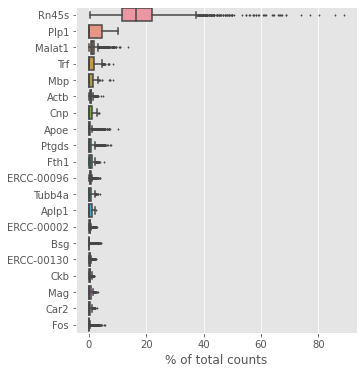

In [32]:
"""Checking the 20 most expressed genes after filtering"""
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,6), gridspec_kw={'left':0.25})
sc.pl.highest_expr_genes(anndata, n_top=20, ax=ax)



In [33]:
"""
1.logarithmirize data 
2. converting gene expression values to Z score (centering and scaling)
"""
sc.pp.log1p(anndata_norm)
sc.pp.scale(anndata_norm)



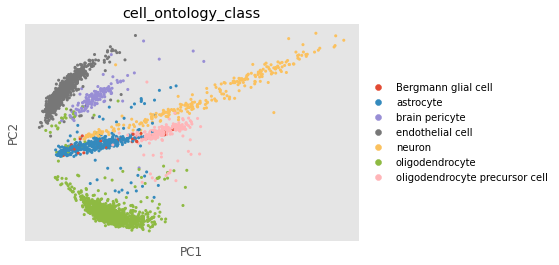

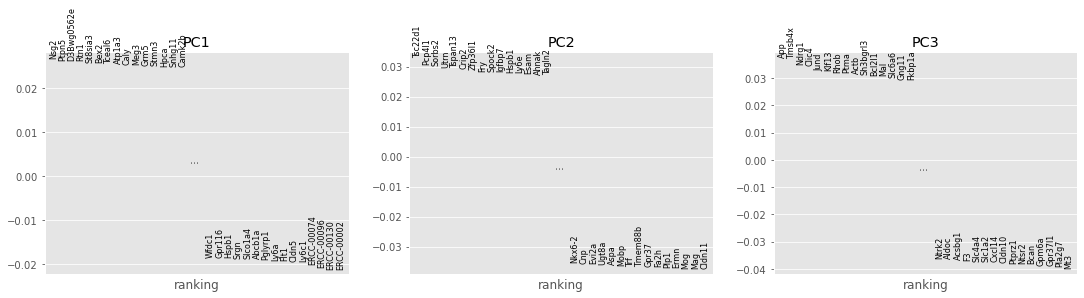

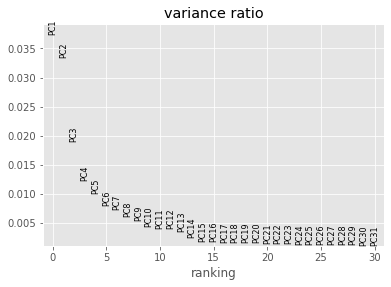

In [34]:
""" 
1.Dimensionality reduction using PCA
2. Building a composite graph using 
a.the first subplot is a graph using two principal components for 7 types of cells used in this research.
b. the next 3 sublops show the most impactful genes on the first three PCA components'
c. the last subplot shows explained variance ratio by each principal component
"""
sc.pp.pca(anndata_norm)
sc.pl.pca_overview(anndata_norm, color='cell_ontology_class')

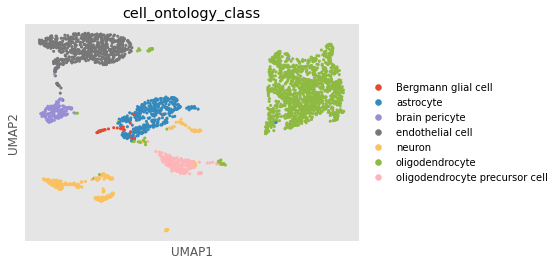

In [35]:
"""Uniform Manifold Approximation and Projection (UMAP) dimensionality reduction was performed on top of PCA. 
UMAP is based on the neighbor graph. The number of UMAP components is 2.
The graph is builf using two principal components for 7 types of cells used in this research"""
%matplotlib inline
sc.pp.neighbors(anndata_norm) # UMAP is based on the neighbor graph; we'll compute this first
sc.tl.umap(anndata_norm, min_dist=0.4, spread=1.1, random_state=1, n_components=2)
sc.pl.umap(anndata_norm, color='cell_ontology_class')


In [36]:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt



In [37]:
"""K-means elbow metho to determine an optimal number of k.
K-Means is built on top of UMAP"""
umap_coordinates = anndata_norm.obsm['X_umap'] 
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1000,
}

# A list holds the wss values for each k
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(umap_coordinates)
    wss.append(kmeans.inertia_)

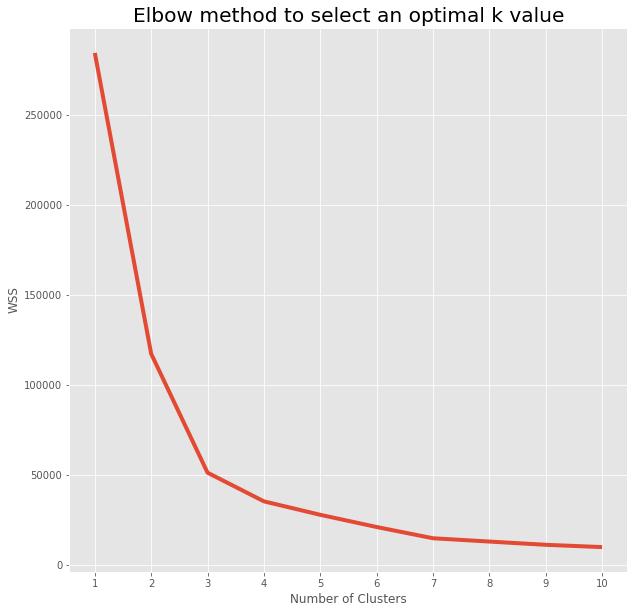

In [38]:
"""Plotting different k values vs wss valus"""
%matplotlib inline
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot()
plt.style.use("fivethirtyeight")
ax.plot(range(1, 11), wss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.title("Elbow method to select an optimal k value")
plt.show()

... storing 'kmeans' as categorical


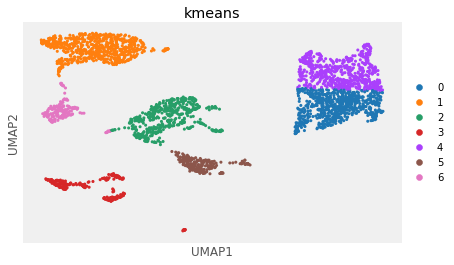

<Figure size 432x288 with 0 Axes>

In [39]:
"""K-Means clustering was used on top of UMAP"""
%matplotlib inline
umap_coordinates = anndata_norm.obsm['X_umap'] # extract the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=7, random_state=100).fit(umap_coordinates) # fix the random state for reproducibility

anndata_norm.obs['kmeans'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
anndata_norm.obs['kmeans'] = anndata_norm.obs['kmeans'].astype(str)

sc.pl.umap(anndata_norm, color='kmeans') # plot the results
plt.savefig("kmeans_umap")

In [40]:
"""calculation of adjusted rand score of K-Means"""
rand_score = adjusted_rand_score(labels_true = anndata_norm.obs['cell_ontology_class'], labels_pred = anndata_norm.obs['kmeans'])
print('The adjusted rand score of K-Means: ', round(rand_score, 2))

The adjusted rand score of K-Means:  0.65


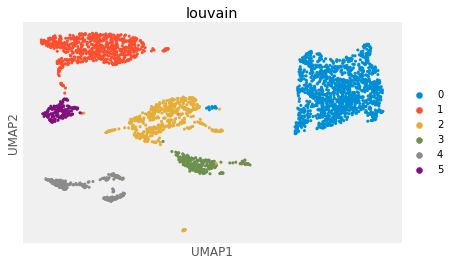

The adjusted rand score of Louvain:  0.91


In [41]:
"""Louvain clustering was used on top of UMAP"""
%matplotlib inline
import scanpy as sc
import scanpy.tools as tl
tl.louvain(anndata_norm, resolution=0.1)
sc.pl.umap(anndata_norm, color='louvain')
rand_score = adjusted_rand_score(anndata_norm.obs['cell_ontology_class'], anndata_norm.obs['louvain'])
print('The adjusted rand score of Louvain: ', round(rand_score, 2))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


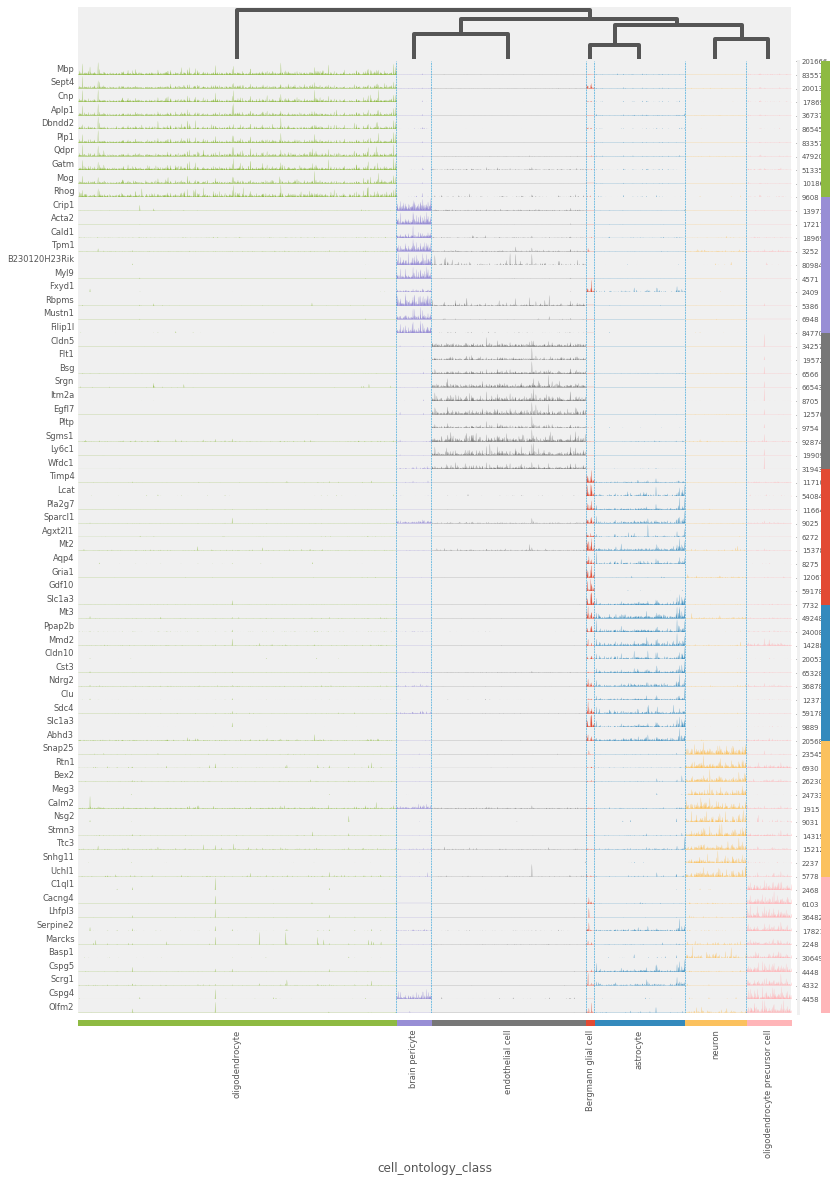

In [43]:
"""The dendrogram showing the 10 top differentially expressed genes for each type of cell"""
%matplotlib inline
#adding the raw data (not normalized, not logarithmirized, and not scaled to the anndata_norm object)
anndata_norm.raw = anndata
sc.tl.rank_genes_groups(anndata_norm, groupby='cell_ontology_class', use_raw=True,
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(anndata_norm,  groupby='cell_ontology_class', save="dendrogram") # plot the result



In [48]:
"""The five top differentially expressed genes for each type of cell"""
sc.tl.rank_genes_groups(anndata_norm, groupby='cell_ontology_class', 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
pd.DataFrame(anndata_norm.uns['rank_genes_groups']['names']).head(5)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


,Bergmann glial cell,astrocyte,brain pericyte,endothelial cell,neuron,oligodendrocyte,oligodendrocyte precursor cell
0,Timp4,Mt3,Crip1,Cldn5,Snap25,Mbp,C1ql1
1,Lcat,Ppap2b,Acta2,Flt1,Rtn1,Sept4,Cacng4
2,Pla2g7,Mmd2,Cald1,Bsg,Bex2,Cnp,Lhfpl3
3,Sparcl1,Cldn10,Tpm1,Srgn,Meg3,Aplp1,Serpine2
4,Agxt2l1,Cst3,B230120H23Rik,Itm2a,Calm2,Dbndd2,Marcks
